# Day7 - Removing Outliers

#### Yesterday, I observed better scores and less variance by removing "outlier samples". These were bad samples, which caused high variance and lower score in the model performance, as "train_test_split()" had put random number of them into training set. 

#### I realized that the way I tried to remove outliers was wrong yesterday. I tried to determine if a feature was genered from a normal distribution by only seeing thier "Z-score", but it doesn't necessarily mean that. Today, I will use histogram and try to observe a distribution.

#### After removing them from the features which seemed like a normal distribution, simple XGBClassifier got less variance with better performance.

#### Today, I will try to further investigate each features, and see if I can find more outliers, i.e. "bad samples".

#### On the other hand, I should also try more on stacking. On day5 I tried it but didn't do very well. However, stacking may work well with improved training set. Also, I think that the way I tuned hyper parameters for stacking on day5 wasn't appropriate.

#### I have another notebook day7-2 where I just ran XGBClassifier with new data I get from this notebook. (Can't do it here because of the conflict of XGB and pyplotlib)

In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import LinearSVC, SVC
import numpy as np
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.model_selection import GridSearchCV
import pandas as pd
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from fitter import Fitter

In [2]:
data = pd.read_csv('train_final.csv')
X_pred_data = pd.read_csv('test_final.csv')
X_pred = np.asarray(X_pred_data.iloc[:, 1:25]).reshape(-1, 24)

In [3]:
X = np.asarray(data.iloc[:, 2:26]).reshape(-1, 24)
y = np.asarray(data.iloc[:, 1]).reshape(-1, 1)
X_original = X

In [4]:
mean = []
std = []
for i in range(X.shape[1]):
    mean.append(np.mean(X[:, i]))
    std.append(np.std(X[:, i]))

#### First, I will save all 24 features' histograms before cleaning them.

In [5]:
%%capture
hists = []
new_hists = []
for i in range(X.shape[1]):
    plt.hist(X[:, i], bins=30)
    plt.title('(before cleaning)  feature' + str(i+1) + "   $\mu$ : %.1f     $\sigma$ : %.1f" %(mean[i], std[i]))
    hists.append(plt.gcf())
    plt.show()

#### Now, I will manually try to remove outliers, with respect to each features.

#### In order to avoid "removing too many outliers", which will lead to too much reduction of training set size, I will remove at most 0.75% reagarding to each feature.

### Feature 1

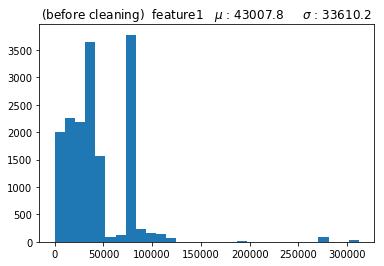

In [6]:
hists[0]

In [7]:
print("<feature 1> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 0] > 150000)[0])/X.shape[0]), "%")

<feature 1> outliers observation by eye:
0.696 %


In [8]:
del1 = np.flip(np.where(X[:, 0] > 150000)[0])

In [9]:
for i in del1:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

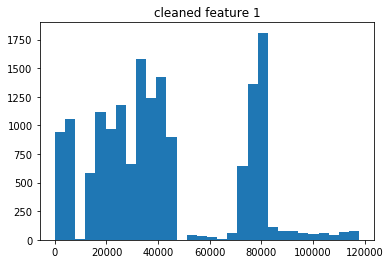

In [10]:
plt.hist(X[:, 0], bins = 30)
plt.title("cleaned feature 1")
new_hists.append(plt.gcf())
plt.show()

### Feature 2

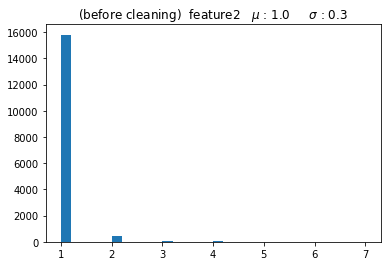

In [11]:
hists[1]

In [12]:
print("<feature 2> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 1] > 4.5)[0])/X.shape[0]), "%")

<feature 2> outliers observation by eye:
0.080 %


In [13]:
del2 = np.flip(np.where(X[:, 1] > 4.5))

In [14]:
for i in del2:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

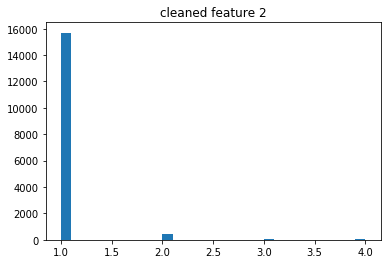

In [15]:
plt.hist(X[:, 1], bins = 30)
plt.title("cleaned feature 2")
new_hists.append(plt.gcf())
plt.show()

### Feature 3

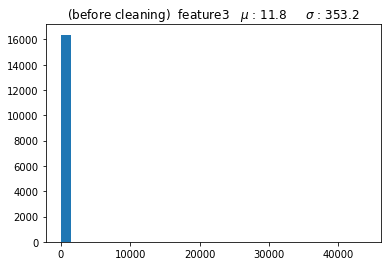

In [16]:
hists[2]

In [17]:
print("<feature 3> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 2] > 500)[0])/X.shape[0]), "%")

<feature 3> outliers observation by eye:
0.172 %


In [18]:
del3 = np.flip(np.where(X[:, 2] > 500))

In [19]:
for i in del3:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

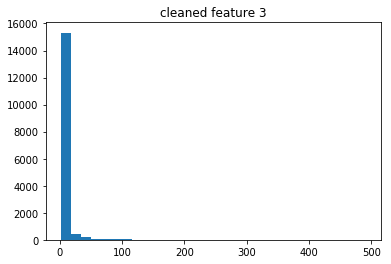

In [20]:
plt.hist(X[:, 2], bins = 30)
plt.title("cleaned feature 3")
new_hists.append(plt.gcf())
plt.show()

### Feature 4

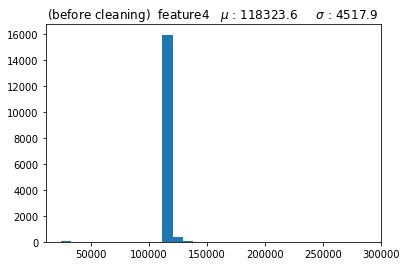

In [21]:
hists[3]

In [22]:
print("<feature 4> outliers observation by eye:")
print("%.3f" %(100 * (len(np.where(X[:, 3] < 50000)[0])+len(np.where(X[:, 3] > 150000)[0]))/X.shape[0]), "%")

<feature 4> outliers observation by eye:
0.283 %


In [23]:
del4_1 = np.flip(np.where(X[:, 3] < 50000)[0])
for i in del4_1:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)
del4_2 = np.flip(np.where(X[:, 3] > 150000)[0])
for i in del4_2:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

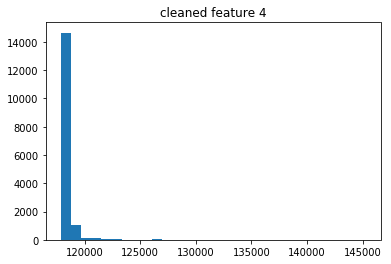

In [24]:
plt.hist(X[:, 3], bins = 30)
plt.title("cleaned feature 4")
new_hists.append(plt.gcf())
plt.show()

### Featrue 5

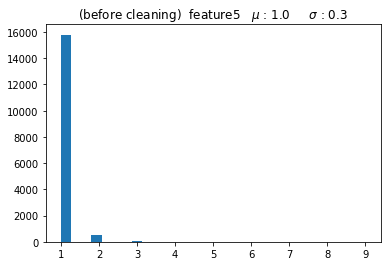

In [25]:
hists[4]

In [26]:
print("<feature 5> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 4] > 3.5)[0])/X.shape[0]), "%")

<feature 5> outliers observation by eye:
0.179 %


In [27]:
del5 = np.flip(np.where(X[:, 4] > 3.5))

In [28]:
for i in del5:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

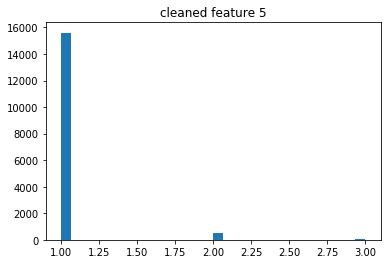

In [29]:
plt.hist(X[:, 4], bins = 30)
plt.title("cleaned feature 5")
new_hists.append(plt.gcf())
plt.show()

### Feature 6

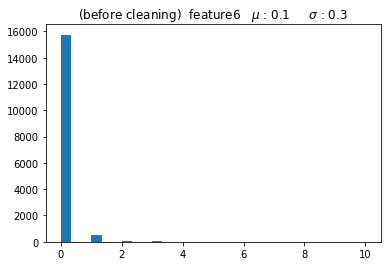

In [30]:
hists[5]

In [31]:
print("<feature 6> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 5] > 3.9)[0])/X.shape[0]), "%")

<feature 6> outliers observation by eye:
0.074 %


In [32]:
del6 = np.flip(np.where(X[:, 5] > 3.9)[0])

In [33]:
for i in del6:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

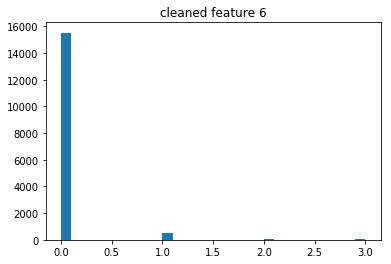

In [34]:
plt.hist(X[:, 5], bins = 30)
plt.title("cleaned feature 6")
new_hists.append(plt.gcf())
plt.show()

### Feature 7

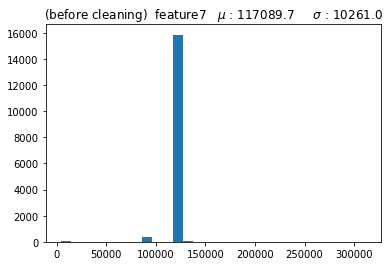

In [35]:
hists[6]

In [36]:
print("<feature 7> outliers observation by eye:")
print("%.3f" %(100 * (len(np.where(X[:, 6] < 50000)[0])+len(np.where(X[:, 6] > 150000)[0]))/X.shape[0]), "%")

<feature 7> outliers observation by eye:
0.706 %


In [37]:
del7_1 = np.flip(np.where(X[:, 6] < 50000)[0])
for i in del7_1:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)
del7_2 = np.flip(np.where(X[:, 6] > 150000)[0])
for i in del7_2:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

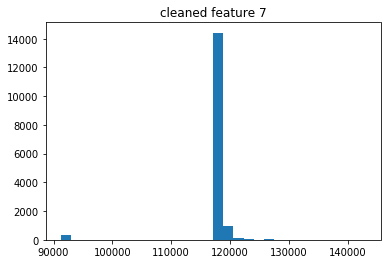

In [38]:
plt.hist(X[:, 6], bins = 30)
plt.title("cleaned feature 7")
new_hists.append(plt.gcf())
plt.show()

### Feature 8

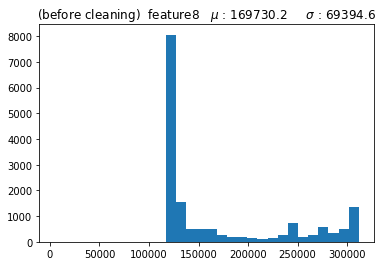

In [39]:
hists[7]

In [40]:
print("<feature 8> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 7] < 110000)[0])/X.shape[0]), "%")

<feature 8> outliers observation by eye:
0.062 %


In [41]:
del8 = np.flip(np.where(X[:, 7] < 110000)[0])

In [42]:
for i in del8:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

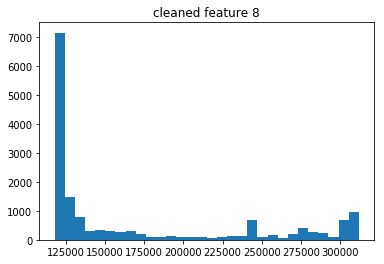

In [43]:
plt.hist(X[:, 7], bins = 30)
plt.title("cleaned feature 8")
new_hists.append(plt.gcf())
plt.show()

### Feature 9

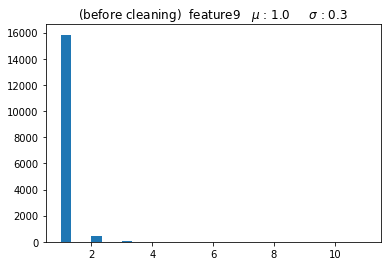

In [44]:
hists[8]

In [45]:
print("<feature 9> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 8] > 3.9)[0])/X.shape[0]), "%")

<feature 9> outliers observation by eye:
0.137 %


In [46]:
del9 = np.flip(np.where(X[:, 8] > 3.9)[0])

In [47]:
for i in del9:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

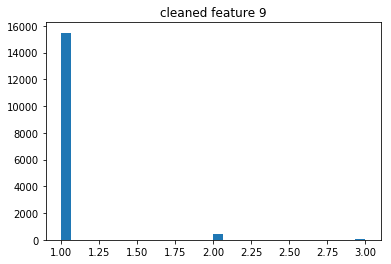

In [48]:
plt.hist(X[:, 8], bins = 30)
plt.title("cleaned feature 9")
new_hists.append(plt.gcf())
plt.show()

### Feature 10

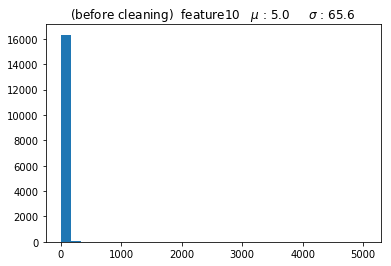

In [49]:
hists[9]

In [50]:
print("<feature 10> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 9] > 150)[0])/X.shape[0]), "%")

<feature 10> outliers observation by eye:
0.425 %


In [51]:
del10 = np.flip(np.where(X[:, 9] > 150)[0])

In [52]:
for i in del10:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

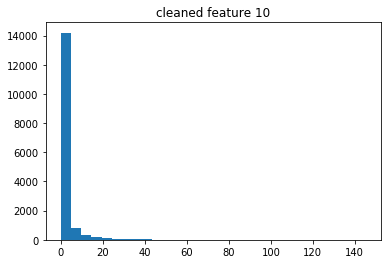

In [53]:
plt.hist(X[:, 9], bins = 30)
plt.title("cleaned feature 10")
new_hists.append(plt.gcf())
plt.show()

### Feature 11

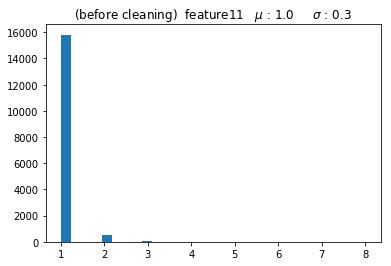

In [54]:
hists[10]

In [55]:
print("<feature 11> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 10] > 3.5)[0])/X.shape[0]), "%")

<feature 11> outliers observation by eye:
0.188 %


In [56]:
del11 = np.flip(np.where(X[:, 10] > 3.5)[0])

In [57]:
for i in del11:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

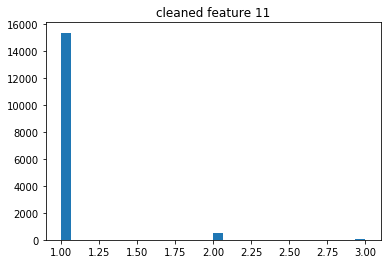

In [58]:
plt.hist(X[:, 10], bins = 30)
plt.title("cleaned feature 11")
new_hists.append(plt.gcf())
plt.show()

### Feature 12

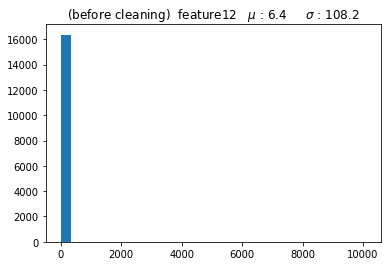

In [59]:
hists[11]

In [60]:
print("<feature 12> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 11] > 100)[0])/X.shape[0]), "%")

<feature 12> outliers observation by eye:
0.541 %


In [61]:
del12 = np.flip(np.where(X[:, 11] > 100)[0])

In [62]:
for i in del12:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

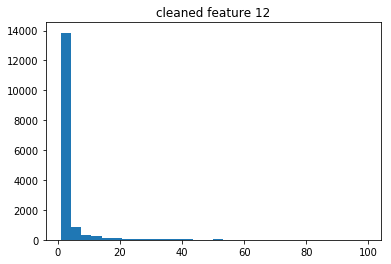

In [63]:
plt.hist(X[:, 11], bins = 30)
plt.title("cleaned feature 12")
new_hists.append(plt.gcf())
plt.show()

### Feature 13

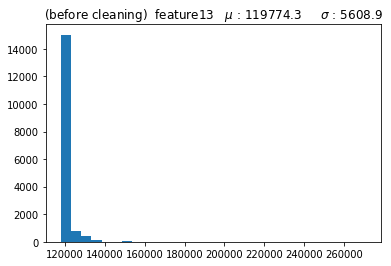

In [64]:
hists[12]

In [65]:
print("<feature 13> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 12] > 150000)[0])/X.shape[0]), "%")

<feature 13> outliers observation by eye:
0.506 %


In [66]:
del13 = np.flip(np.where(X[:, 12] > 150000)[0])

In [67]:
for i in del13:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

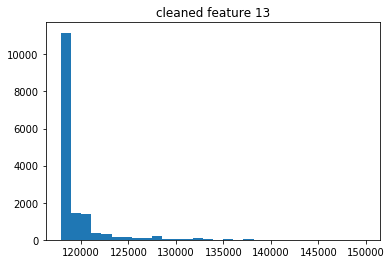

In [68]:
plt.hist(X[:, 12], bins = 30)
plt.title("cleaned feature 13")
new_hists.append(plt.gcf())
plt.show()

### Feature 14

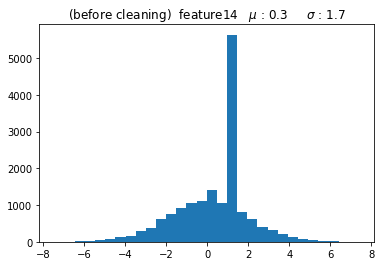

In [69]:
hists[13]

In [70]:
print("<feature 14> outliers observation by eye:")
print("%.3f" %(100 * (len(np.where(X[:, 13] < -6.5)[0])+len(np.where(X[:, 13] > 7)[0]))/X.shape[0]), "%")

<feature 14> outliers observation by eye:
0.044 %


In [71]:
del14_1 = np.flip(np.where(X[:, 13] < -6.5)[0])
for i in del14_1:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)
del14_2 = np.flip(np.where(X[:, 13] > 7)[0])
for i in del14_2:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

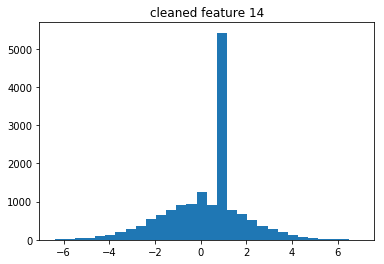

In [72]:
plt.hist(X[:, 13], bins = 30)
plt.title("cleaned feature 14")
new_hists.append(plt.gcf())
plt.show()

### Feature 15

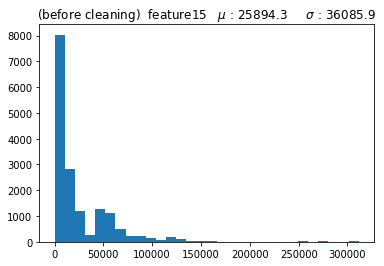

In [73]:
hists[14]

In [74]:
print("<feature 15> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 14] > 250000)[0])/X.shape[0]), "%")

<feature 15> outliers observation by eye:
0.534 %


In [75]:
del15 = np.flip(np.where(X[:, 14] > 250000)[0])

In [76]:
for i in del15:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

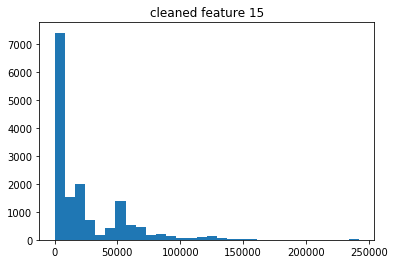

In [77]:
plt.hist(X[:, 14], bins = 30)
plt.title("cleaned feature 15")
new_hists.append(plt.gcf())
plt.show()

### Feature 16

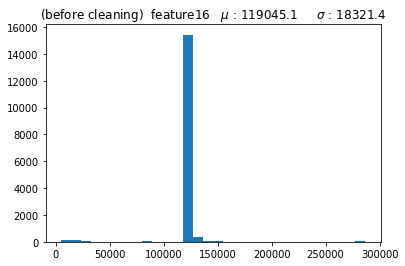

In [78]:
hists[15]

In [79]:
print("<feature 16> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 15] > 200000)[0])/X.shape[0]), "%")

<feature 16> outliers observation by eye:
0.563 %


In [80]:
del16 = np.flip(np.where(X[:, 15] > 160000)[0])

In [81]:
for i in del16:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

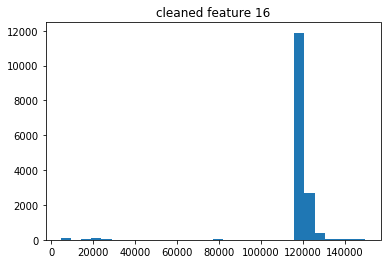

In [82]:
plt.hist(X[:, 15], bins = 30)
plt.title("cleaned feature 16")
new_hists.append(plt.gcf())
plt.show()

### Feature 17

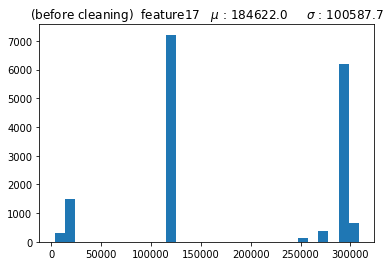

In [83]:
hists[16]

#### This doesn't seem to have outliers. I won't do anything regarding to this feature.

In [84]:
new_hists.append(hists[16])

### Feature 18

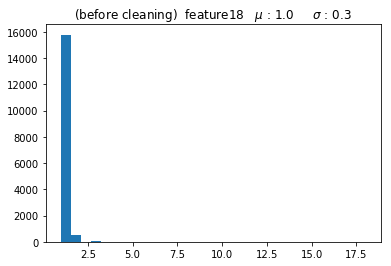

In [85]:
hists[17]

In [86]:
print("<feature 18> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 17] > 3)[0])/X.shape[0]), "%")

<feature 18> outliers observation by eye:
0.200 %


In [87]:
del18 = np.flip(np.where(X[:, 17] > 3)[0])

In [88]:
for i in del18:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

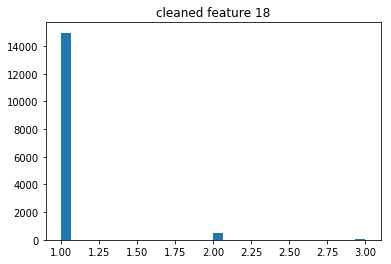

In [89]:
plt.hist(X[:, 17], bins = 30)
plt.title("cleaned feature 18")
new_hists.append(plt.gcf())
plt.show()

### Feature 19

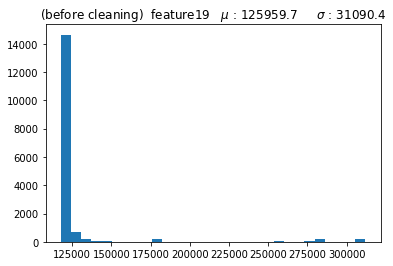

In [90]:
hists[18]

In [91]:
print("<feature 19> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 18] > 160000)[0])/X.shape[0]), "%")

<feature 19> outliers observation by eye:
4.374 %


#### In this feature, I can see a shape where (value < 16000), but there are too many samples out of that range, so I won't do anything with this feature. 4.37% is a lot.

In [92]:
new_hists.append(hists[18])

### Feature 20

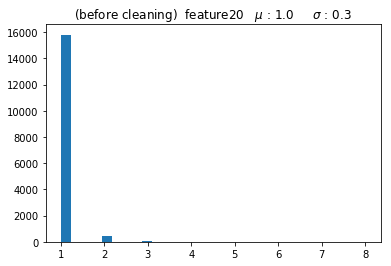

In [93]:
hists[19]

In [94]:
print("<feature 20> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 19] > 3)[0])/X.shape[0]), "%")

<feature 20> outliers observation by eye:
0.161 %


In [95]:
del20 = np.flip(np.where(X[:, 19] > 3)[0])

In [96]:
for i in del20:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

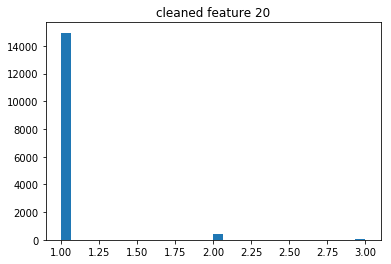

In [97]:
plt.hist(X[:, 19], bins = 30)
plt.title("cleaned feature 20")
new_hists.append(plt.gcf())
plt.show()

### Feature 21

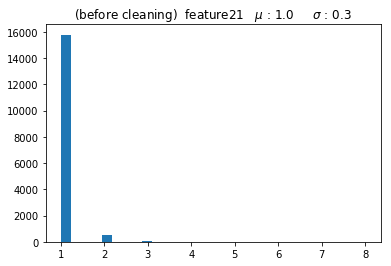

In [98]:
hists[20]

In [99]:
print("<feature 21> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 20] > 3)[0])/X.shape[0]), "%")

<feature 21> outliers observation by eye:
0.168 %


In [100]:
del21 = np.flip(np.where(X[:, 20] > 3)[0])

In [101]:
for i in del21:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

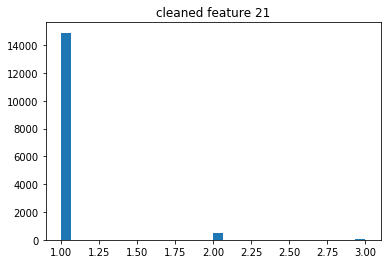

In [102]:
plt.hist(X[:, 20], bins = 30)
plt.title("cleaned feature 21")
new_hists.append(plt.gcf())
plt.show()

### Feature 22

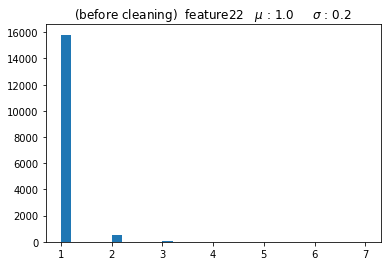

In [103]:
hists[21]

In [104]:
print("<feature 22> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 21] > 3)[0])/X.shape[0]), "%")

<feature 22> outliers observation by eye:
0.162 %


In [105]:
del22 = np.flip(np.where(X[:, 21] > 3)[0])

In [106]:
for i in del22:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

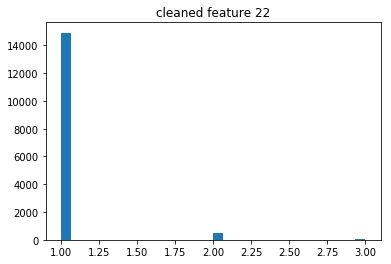

In [107]:
plt.hist(X[:, 21], bins = 30)
plt.title("cleaned feature 22")
new_hists.append(plt.gcf())
plt.show()

### Feature 23

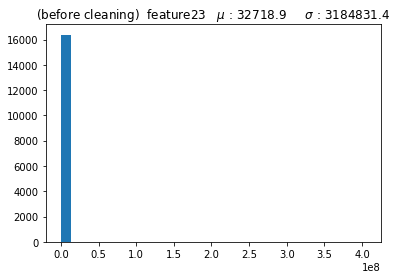

In [108]:
hists[22]

In [109]:
print("<feature 23> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 22] > 100000)[0])/X.shape[0]), "%")

<feature 23> outliers observation by eye:
0.214 %


In [110]:
del23 = np.flip(np.where(X[:, 22] > 20000)[0])

In [111]:
for i in del23:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

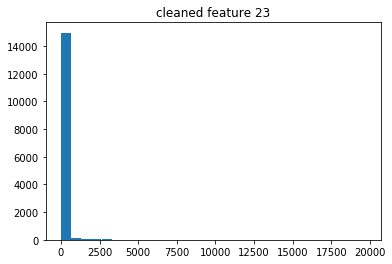

In [112]:
plt.hist(X[:, 22], bins = 30)
plt.title("cleaned feature 23")
new_hists.append(plt.gcf())
plt.show()

### Feature 24

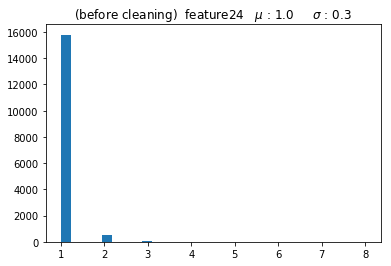

In [113]:
hists[23]

In [114]:
print("<feature 24> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 23] > 3)[0])/X.shape[0]), "%")

<feature 24> outliers observation by eye:
0.176 %


In [115]:
del24 = np.flip(np.where(X[:, 23] > 3)[0])

In [116]:
for i in del24:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

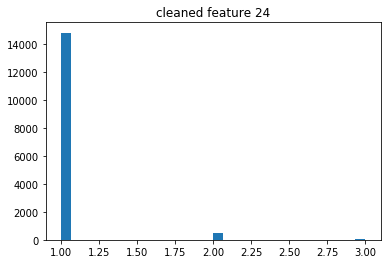

In [117]:
plt.hist(X[:, 23], bins = 30)
plt.title("cleaned feature 24")
new_hists.append(plt.gcf())
plt.show()

### Now, I have a data that is (hopefully) useful than before. Now I will save them to a new .csv as my Jupyter Notebook has issue when running plt and xgboost togather. (Seems like an issue of MacOS)

In [118]:
f_names = ['Id',  'Y']
for i in range(X.shape[1]):
    f_names.append('f' + str(i+1))

In [119]:
Id = np.arange(X.shape[0]).reshape(-1, 1)+1
new_dataset = pd.DataFrame(np.hstack((Id, y, X[:, 0:24])), columns = f_names) 

In [120]:
new_dataset.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1.0,1.0,25884.0,1.0,33.63,118596.0,1.0,0.0,118595.0,125738.0,...,1945.0,118450.0,119184.0,1.0,121372.0,1.0,1.0,1.0,2.0,1.0
1,2.0,1.0,34346.0,1.0,10.62,118041.0,1.0,0.0,117902.0,130913.0,...,15385.0,117945.0,292795.0,1.0,259173.0,1.0,1.0,1.0,1.0,1.0
2,3.0,1.0,34923.0,1.0,1.77,118327.0,1.0,0.0,117961.0,124402.0,...,7547.0,118933.0,290919.0,1.0,118784.0,1.0,1.0,1.0,1.0,1.0
3,4.0,1.0,80926.0,1.0,30.09,118300.0,1.0,0.0,117961.0,301218.0,...,4933.0,118458.0,118331.0,1.0,307024.0,1.0,1.0,1.0,2.0,1.0
4,5.0,1.0,4674.0,1.0,1.77,119921.0,1.0,0.0,119920.0,302830.0,...,13836.0,142145.0,4673.0,1.0,128230.0,1.0,1.0,1.0,620.0,1.0


In [121]:
data.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,...,13836,142145,4673,1,128230,1,1,1,620,1


#### So I ensured that new training data looks similar to given one.

In [1]:
#new_dataset.to_csv("train_new.csv", index=False)

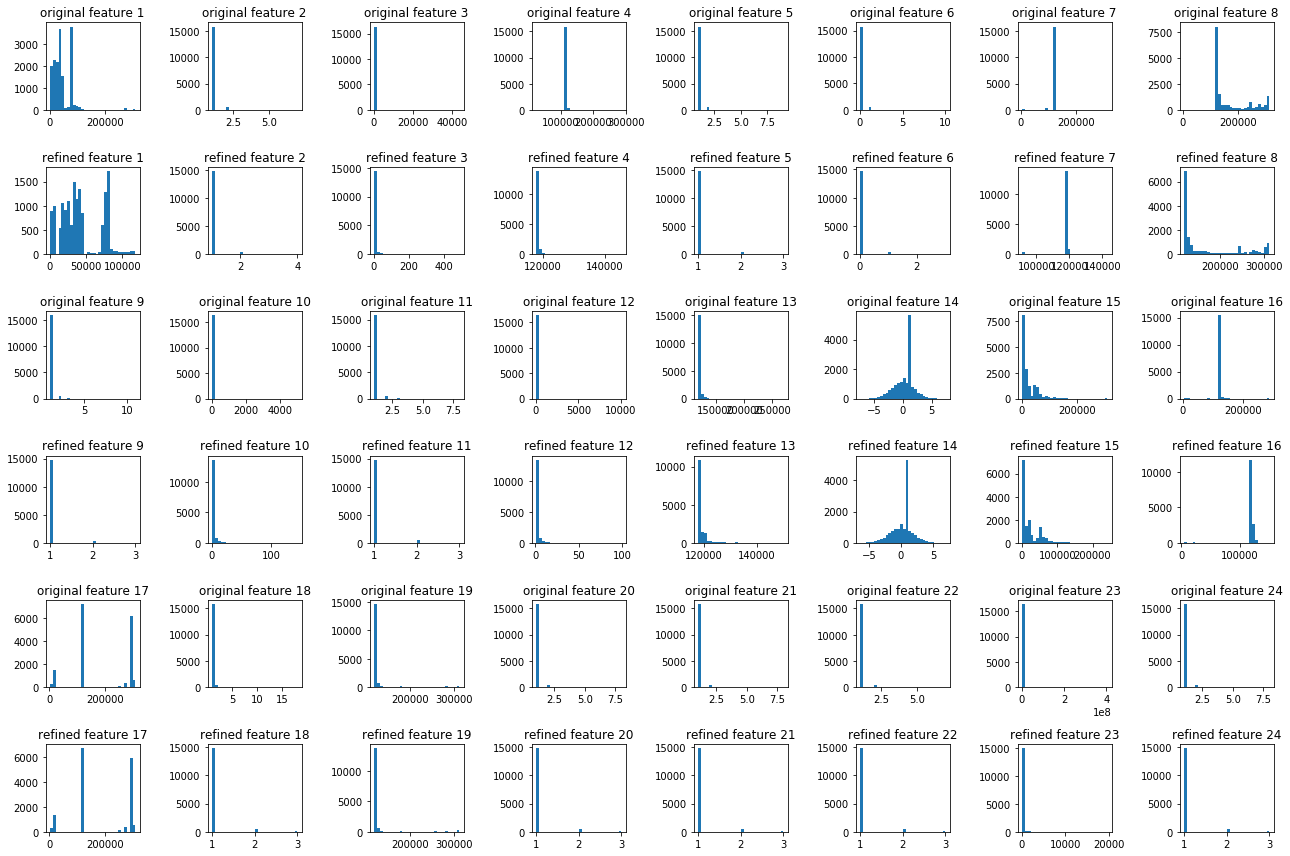

In [124]:
fig, grid = plt.subplots(6, 8, figsize=(18, 12))
for i in range(6):
    for j in range(8):
        if(i%2 == 0):
            grid[i, j].hist(X_original[:, i*4+j], bins=30)
            grid[i, j].set_title("original feature %d" %(i*4+j+1))
        else:
            grid[i, j].hist(X[:, (i-1)*4+j], bins=30)
            grid[i, j].set_title("refined feature %d" %((i-1)*4+j+1))
fig.tight_layout()

### Here is a overall view of each features before and after removing outliers.